In [5]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../SourceCode')
import bastien_utils
from shallowAE import ShallowAE
from sparseShallowAE import SparseShallowAE_KL, SparseShallowAE_L1, SparseShallowAE_KL_sum
from nonNegShallowAE import NonNegShallowAE_NonNegConstraint, NonNegShallowAE_Asymmetric_decay
import datetime
import morphoMaths
import keras
import pandas as pd
keras.__version__

'2.2.0'

In [2]:
FILE_PATH = "../"
path_to_kl_div_sum = "../ShallowAE/Sparse/KL_div_sum/"
data = bastien_utils.load_data(FILE_PATH, train=False, test=True, subsetTest=True)
x_test, y_test, x_small, y_small = data
print('x_small shape:', x_small.shape)
print('x_test shape:', x_test.shape)

x_small shape: (10, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


# 1. Non Negativity Constraint

Non Negativity Constraint, with 400 epochs and early stopping. Keras 2.2.0.

In [3]:
pd.read_csv("../ShallowAE/NonNegativity/NonNegConstraint/TestOutputs/18_08_02results")

,Unnamed: 0,SVM_best_C,SVM_best_gamma,SVM_classification_score,dimension,test_error,test_max_approx_error_toOriginal_dilatation,test_max_approx_error_toRec_dilatation,test_sparsity,training_error,training_max_approx_error_toOriginal_dilatation,training_max_approx_error_toRec_dilatation,training_sparsity
0,0,5.994843,0.599484,0.861,100,0.017343,0.363561,0.383347,0.608772,0.017336,0.362844,0.382139,0.608218


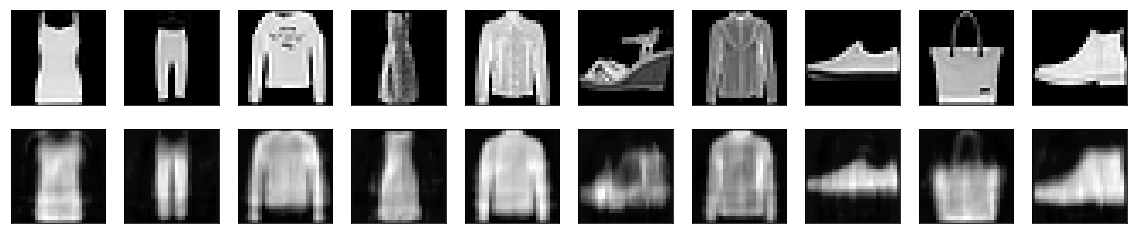

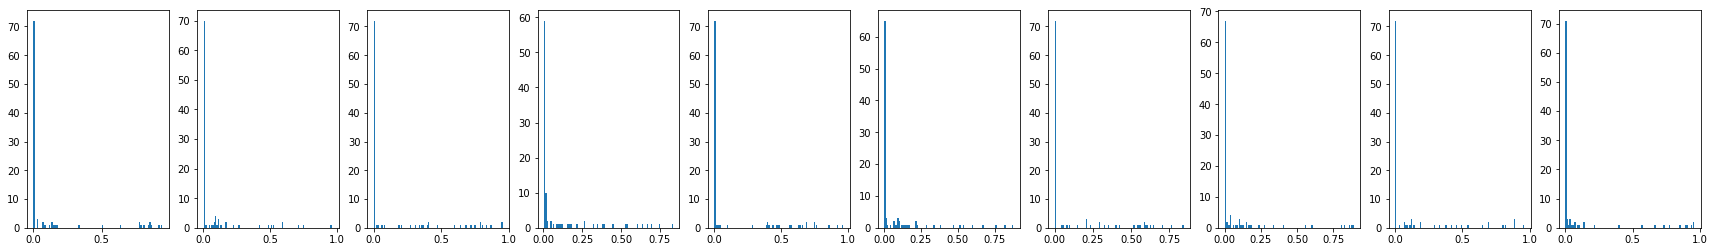

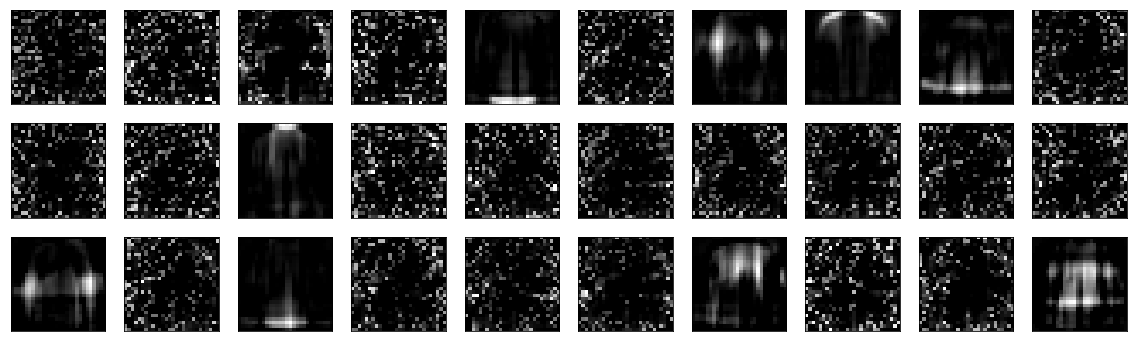

In [7]:
AE = NonNegShallowAE_NonNegConstraint.load('18_08_02_dim100_NonNegConstraint.h5')
AE.plot_reconstructions(x_small)
AE.plot_histograms_of_the_encoding(x_small)
AE.plot_atoms_decoder(nb_to_plot=30)

**Note that the Non Negativity constraint enforces parsity as many negative weights are set to zero.**

**The Non Negativity Constraint is advocated by the Deep Learning Book (explicit re projection rather than introduction of a KKT multiplier in the minimization of the cost function (equivalent to adding another cost function), but it may not be relevant in our case**

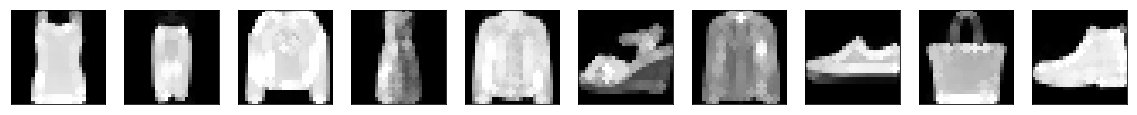

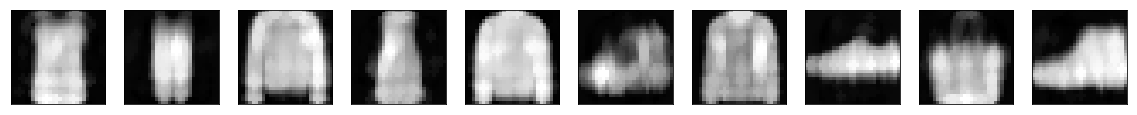

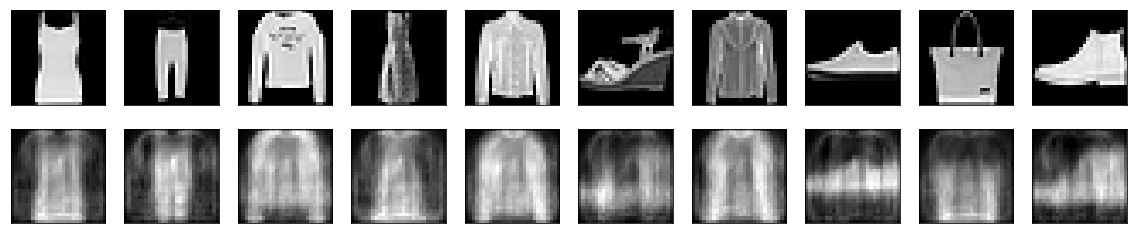

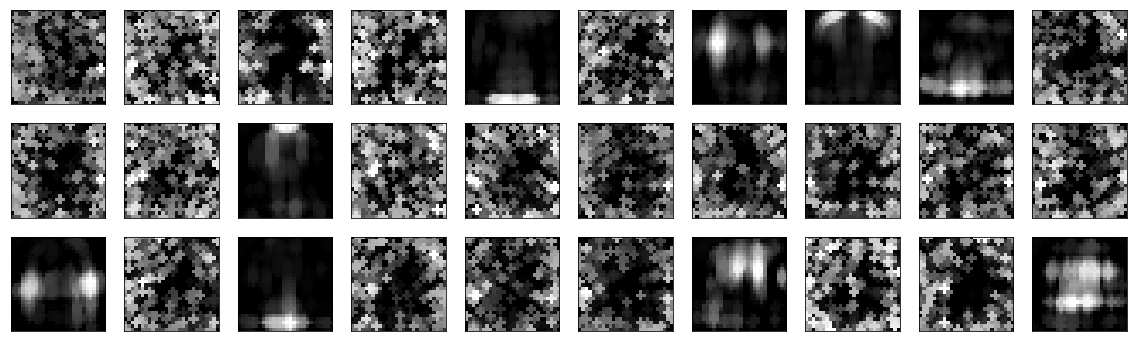

In [9]:
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, x_small, SE_scale=1))
bastien_utils.plot_all_images(bastien_utils.apply_operator_to_all_images(morphoMaths.dilatation, AE.reconstruction(x_small), SE_scale=1))
AE_dil = AE.apply_operator_to_decoder_atoms(morphoMaths.dilatation, apply_to_bias=True, SE_scale=1)
AE_dil.plot_reconstructions(x_small)
AE_dil.plot_atoms_decoder(nb_to_plot=30)

**Slightly better max-approximation to dilatation than without the Non-Neg Constraint, as we can now differ the shapes of the various images.**